### Part A

In [1]:
# Import required packages

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# load the dataset
data = pd.read_csv("CE802_P2_Data.csv")
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,Class
0,3.4009,9.0180,0,2429.040,1.5729,-6901.08,-13.5480,-2204.77,-43.1740,-4.3000,...,-1.96,-7144.9,1,-4.4310,2451.300,12843.744,12.90000,-121.720,NaN,False
1,3.2476,7.4216,1,3365.160,4.3960,-8939.28,-12.7050,-149.17,-43.0300,-3.8674,...,-1.96,-7022.7,0,-6.3270,2274.330,12726.420,10.35480,-975.600,NaN,True
2,2.6765,7.3124,0,3616.860,1.8304,-8944.38,-7.2657,-1898.57,-42.7656,-4.0435,...,-1.96,-6071.9,0,-4.3770,2111.937,12842.944,21.25500,-362.220,NaN,False
3,3.2465,7.4268,0,2263.965,1.5357,-8197.68,-12.9780,-2195.97,-45.5070,-5.1800,...,-0.96,-6703.3,0,-2.3304,4110.300,12812.392,15.83700,-318.680,24.8,True
4,3.3116,7.6242,0,1669.560,1.5597,-8021.43,-8.9535,-2091.79,-45.5200,-6.4990,...,-0.96,-6999.9,1,-3.0663,3516.600,5396.160,9.69801,-285.372,24.3,True


### Data cleaning

In [3]:
# check for missing values
data.columns[data.isna().any()]

Index(['F20'], dtype='object')

In [4]:
# get the statistical summary of all columns

data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,3.484358,8.460027,0.516000,2818.788916,1.753968,-7264.855469,-9.151815,-2081.014585,-52.012299,-4.318608,6.635745,-1.467000,-6635.307898,0.508000,-4.185798,3036.192399,12929.041422,12.632875,-137.867215,21.840200
std,0.869678,1.706913,0.499994,1587.054314,0.765717,2108.672583,1.819802,511.582397,10.285697,0.901204,1.805525,0.500201,1494.941683,0.500186,2.699756,3111.533532,3376.459608,2.708330,493.077434,2.311671
min,2.562220,6.662580,0.000000,-6622.740000,1.230002,-18454.980000,-18.252000,-6005.170000,-123.640000,-7.935000,4.724400,-1.960000,-14719.700000,0.000000,-14.466000,-10635.900000,5396.160000,9.666360,-3419.600000,15.120000
25%,2.833325,7.198000,0.000000,2203.710000,1.278987,-8108.212500,-10.157250,-2215.070000,-54.812500,-4.687000,5.292950,-1.960000,-7266.006500,0.000000,-5.634750,1835.760000,12794.090000,10.552350,-311.682500,20.240000
50%,3.229050,7.917500,1.000000,2460.795000,1.448400,-7679.910000,-8.737050,-2070.058500,-48.942000,-4.037250,6.067400,-1.960000,-7012.600000,1.000000,-3.314400,2416.500000,12831.722000,11.796750,-245.540000,21.800000
75%,3.869500,9.190000,1.000000,2926.260000,1.943675,-6984.855000,-7.700400,-1945.470000,-45.052000,-3.641825,7.428500,-0.960000,-6473.600000,1.000000,-2.080725,3376.725000,12870.380000,13.870500,-110.925000,23.390000
max,7.075000,15.566000,1.000000,19513.260000,7.309000,7180.020000,-6.870168,1398.830000,-41.862328,-3.382990,13.704000,-0.960000,3326.300000,1.000000,-1.264140,26354.100000,118370.160000,23.124000,3042.400000,28.600000


From the above table, for column **F20** the mean and median are almost the same ~ **21.8**. Therefore, replacing the NaN values can be done with either.

#### Replace missing values

In [5]:
# Replace missing values with the median value of that column

data['F20'] = data['F20'].fillna(data['F20'].median())

In [6]:
# split the data into predictors and target variables

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#### Encode target variable classes

In [7]:
# Transform the taget variable from string to numeric labels using LabelEncoder

# import the library
from sklearn.preprocessing import LabelEncoder

# create an instance for the class
encoder = LabelEncoder()

# apply the object to the target variable y
y = encoder.fit_transform(y)

#### Standardize the feature variables

In [8]:
# Standardize the feature variables to have equal scale values

# import the library
from sklearn.preprocessing import StandardScaler

# create an instance for the class
scaler = StandardScaler()

# apply the object to the features X
X = scaler.fit_transform(X)

### Split data into train/test set

In [9]:
# import library
from sklearn.model_selection import StratifiedKFold

# create an instance and intialize parameters
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

### Hyper-parameter tuning

In [10]:
# import the GridSerachCV library
from sklearn.model_selection import GridSearchCV

# function to get the best parameters for the classifier
def perform_param_tuning(classifier, parameters, cv, verbose=1):
    cv_result = GridSearchCV(estimator=classifier,
                            param_grid=parameters,
                            cv=cv,
                            verbose=verbose)
    
    cv_result.fit(X_train, y_train)
    
    return cv_result.best_params_

### 1. Decision Tree Classifier

##### Running the GridSearchCV to get the best parameters

In [11]:
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create object for the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=345)

# define the parameters to optimize
params = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : [None, 'sqrt', 'log2'],
    'max_depth' : [8, 10, 12]
}

# call the hyper-tuning function to get the best parameters for the classifier
res_params = perform_param_tuning(classifier=decision_tree_classifier, parameters=params, cv=5)

# display the best chosen parameters
print(res_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'splitter': 'best'}


##### Fitting the DecisionTreeClasifier with the best chosen parameters

In [12]:
# create an instance of the classifier using the best parameters
final_dt_clf = DecisionTreeClassifier(criterion=res_params['criterion'],
                                     splitter=res_params['splitter'],
                                     max_depth=res_params['max_depth'],
                                     random_state=897)

# fit the model to training data
final_dt_clf.fit(X_train, y_train)

# Predict the outcome of the test set data
y_predict = final_dt_clf.predict(X_test)

##### Evaluating the performance of the model on test data

Accuracy score of Decision Tree model: 0.89
Classification report of Decision Tree model:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        99
           1       0.92      0.85      0.89       101

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



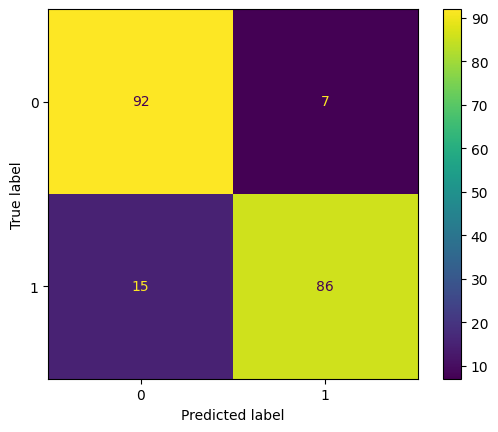

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluate the performance of the decision tree model
print(f"Accuracy score of Decision Tree model: {accuracy_score(y_test, y_predict)}")
print(f"Classification report of Decision Tree model:\n {classification_report(y_test, y_predict)}")

# plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### 2. Logistic Regression

##### Running the GridSearchCV to get the best parameters

In [14]:
# import the logistic regression classifier
from sklearn.linear_model import LogisticRegression
import warnings

# hide the warnings generated by Grid search CV
warnings.filterwarnings('ignore')

# create object for the classifier
logis_reg_classifier = LogisticRegression(random_state=666)

# define the parameters to optimize
params = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# call the hyper-tuning function to get the best parameters for the classifier
res_params = perform_param_tuning(classifier=logis_reg_classifier, parameters=params, cv=10)

# display the best chosen parameters
print(res_params)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'penalty': 'l1', 'solver': 'saga'}


##### Fitting the LogisticRegressionClasifier with the best chosen parameters

In [15]:
# create an instance of the classifier using the best parameters
final_lr_clf = LogisticRegression(penalty=res_params['penalty'],
                                 solver=res_params['solver'],
                                 random_state=657)

# fit the model to training data
final_lr_clf.fit(X_train, y_train)

# Predict the outcome of the test set data
y_predict = final_lr_clf.predict(X_test)

##### Evaluating the performance of the model on test data

Accuracy score of Logistic regression model: 0.78
Classification report of Logistic regression model:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.76      0.82      0.79       101

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



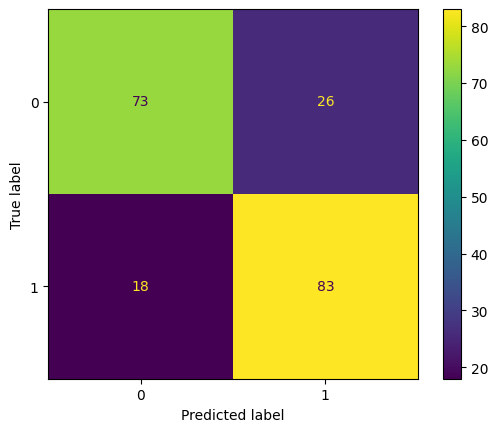

In [16]:
# Evaluate the performance of the logistic regression model
print(f"Accuracy score of Logistic regression model: {accuracy_score(y_test, y_predict)}")
print(f"Classification report of Logistic regression model:\n {classification_report(y_test, y_predict)}")

# plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### 3. Support Vector Machine (SVC)

##### Running the GridSearchCV to get the best parameters

In [17]:
# import the svm classifier
from sklearn.svm import SVC

# create object for the classifier
svc_classifier = SVC(random_state=900)

# define the parameters to optimize
params = {'C': [1, 10, 100, 1000],
           'gamma': [0.1, 0.01, 0.001, 0.0001],
           'kernel': ['rbf', 'sigmoid', 'poly']
         }
    

# call the hyper-tuning function to get the best parameters for the classifier
res_params = perform_param_tuning(classifier=svc_classifier, parameters=params, cv=10)

# display the best chosen parameters
print(res_params)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


##### Fitting the SVCClasifier with the best chosen parameters

In [18]:
# create an instance of the classifier using the best parameters
final_svc_clf = SVC(C=res_params['C'],
                   gamma=res_params['gamma'],
                   kernel=res_params['kernel'],
                   probability=True)

# fit the model to training data
final_svc_clf.fit(X_train, y_train)

# Predict the outcome of the test set data
y_predict = final_svc_clf.predict(X_test)

##### Evaluating the performance of the model on test data

Accuracy score of SVC model: 0.795
Classification report of SVC model:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.79      0.81      0.80       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



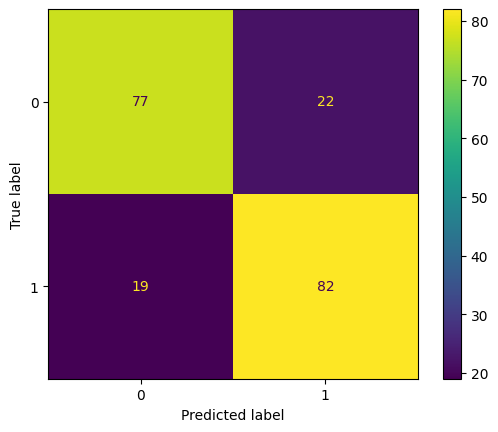

In [19]:
# Evaluate the performance of the SVC model
print(f"Accuracy score of SVC model: {accuracy_score(y_test, y_predict)}")
print(f"Classification report of SVC model:\n {classification_report(y_test, y_predict)}")

# plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

### 4. Gradient Boosting Classifier

##### Running the GridSearchCV to get the best parameters

In [20]:
# import the gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier

# create object for the classifier
gb_classifier = GradientBoostingClassifier(random_state=789)

# define the parameters to optimize
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [8, 10, 12]
}

# call the hyper-tuning function to get the best parameters for the classifier
res_params = perform_param_tuning(classifier=gb_classifier, parameters=params, cv=5)

# display the best chosen parameters
print(res_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'learning_rate': 0.01, 'max_depth': 10, 'max_features': 'sqrt'}


##### Fitting the GradientBoostClasifier with the best chosen parameters

In [21]:
# create an instance of the classifier using the best parameters
final_gb_clf = GradientBoostingClassifier(learning_rate=res_params['learning_rate'],
                                         max_depth=res_params['max_depth'],
                                         max_features=res_params['max_features'])

# fit the model to training data
final_gb_clf.fit(X_train, y_train)

# Predict the outcome of the test set data
y_predict = final_gb_clf.predict(X_test)

##### Evaluating the performance of the model on test data

Accuracy score of Gradient Boosting model: 0.895
Classification report of Gradient Boosting model:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        99
           1       0.91      0.88      0.89       101

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



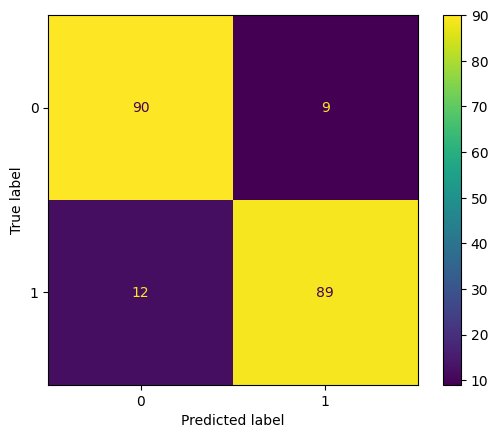

In [22]:
# Evaluate the performance of the SVC model
print(f"Accuracy score of Gradient Boosting model: {accuracy_score(y_test, y_predict)}")
print(f"Classification report of Gradient Boosting model:\n {classification_report(y_test, y_predict)}")

# plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

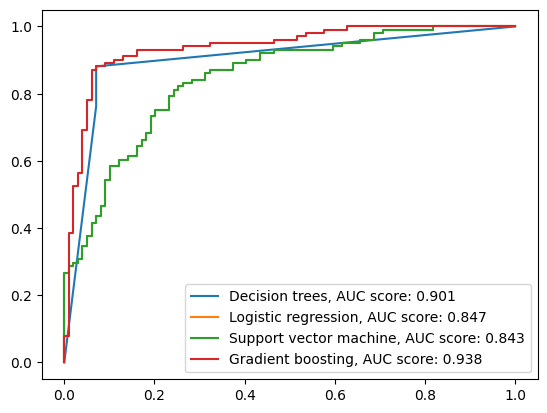

In [23]:
# plot the ROC curve for all 4 classifiers
plt.figure(0).clf()

# import the metric libraries
from sklearn.metrics import roc_curve, roc_auc_score

# Decision Tree
y_pred_dt = final_dt_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
auc_dt = round(roc_auc_score(y_test, y_pred_dt), 3)

plt.plot(fpr, tpr, label="Decision trees, AUC score: "+ str(auc_dt))

# Logistic regression
y_pred_lr = final_lr_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
auc_lr = round(roc_auc_score(y_test, y_pred_lr), 3)

plt.plot(fpr, tpr, label="Logistic regression, AUC score: "+ str(auc_lr))

# Support vector machine
y_pred_svc = final_svc_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
auc_svc = round(roc_auc_score(y_test, y_pred_svc), 3)

plt.plot(fpr, tpr, label="Support vector machine, AUC score: "+ str(auc_svc))

# Gradient boosting
y_pred_gb = final_gb_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
auc_gb = round(roc_auc_score(y_test, y_pred_gb), 3)

plt.plot(fpr, tpr, label="Gradient boosting, AUC score: "+ str(auc_gb))

plt.legend(loc = "lower right")